In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
# OBTENER EL DATASET

data_player = pd.read_csv("../LIBRERIAS/datos/player_valuations.csv")
data_player.head()

In [ ]:
# CAMBIAR EL NOMBRE DE UNA COLUMNA

data_player.rename(columns={"date": "fecha" }, inplace=True)
data_player.rename(columns={"player_id": "id_jugador" }, inplace=True)
data_player.rename(columns={"market_value_in_eur": "precio_en_euros" }, inplace=True)
data_player.rename(columns={"current_club_id": "id_club_actual" }, inplace=True)
data_player.rename(columns={"player_club_domestic_competition_id": "id_competicion_domestica" }, inplace=True)

data_player.head()

In [ ]:
# ORDENAR LOS DATOS

data_order_dsc = data_player.sort_values(by="precio_en_euros", ascending=False)
data_order_asc = data_player.sort_values(by="precio_en_euros", ascending=True)
data_order_dsc.head()

ESTADÍSTICA DESCRIPTIVA

In [ ]:
# Configurar formato de visualización para mostrar números completos

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_order_dsc.describe()

In [ ]:
# FUNCIONES EN PANDAS

print("MEDIA: ", data_order_dsc["precio_en_euros"].mean()) # Media
print("MEDIANA: ", data_order_dsc["precio_en_euros"].median()) # Mediana
print("MODA: ", data_order_dsc["precio_en_euros"].mode()) # Moda

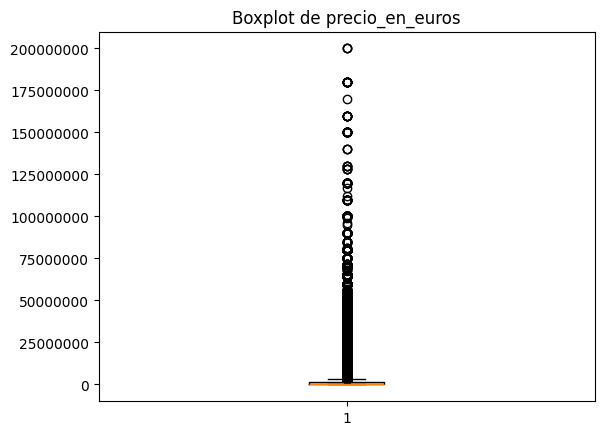

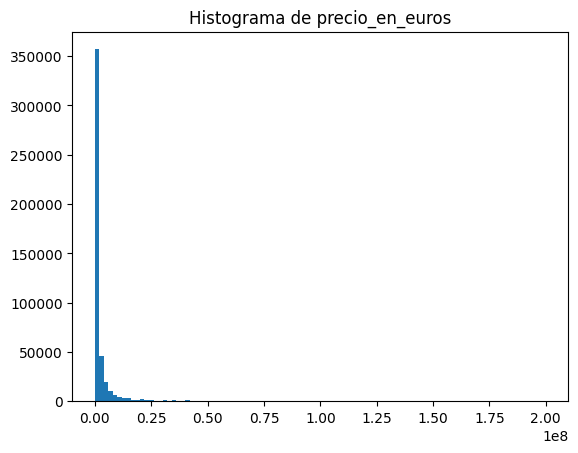

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos

plt.ticklabel_format(style="plain", axis="y")

# Boxplot con matplotlib 
plt.boxplot(data_order_dsc["precio_en_euros"])
plt.title("Boxplot de precio_en_euros")
plt.show()

# Histograma con matplotlib
plt.hist(data_order_dsc["precio_en_euros"], bins=100)
plt.title("Histograma de precio_en_euros")
plt.show()